In [452]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
import tqdm
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from mrmr import mrmr_classif

In [2]:
df=pd.read_csv('player_stats.csv', sep=',', encoding='latin-1')

In [3]:
df.duplicated().sum()


0

In [4]:
df

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,73,72,68,30,65,30,50,33,64,49,41,55,86,40,52,43,51,64,54,30,31,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,58,62,70,69,70,64,54,60,63,63,64,87,81,42,67,65,65,54,60,64,68,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,16,27,65,17,20,49,48,14,35,18,46,38,68,41,48,36,60,17,51,14,20,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,69,71,64,48,66,29,70,44,58,53,35,73,82,56,63,57,80,67,32,24,33,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,16,28,50,10,12,38,34,11,23,20,38,28,64,24,31,34,27,13,48,4,6,9,10,16,5,61,59,62,64,64,$300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,Karim Benzema,France,185,81,35,Real Madrid,91,87,None,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7,$64.000.000
5676,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,None,41,43,63,92,91,55,84,90,80,84,77,89,87,76,91,89,89,69,59,82,92,84,84,69,86,83,11,14,14,9,14,$99.500.000
5677,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,None,29,32,63,88,86,37,90,93,83,85,81,88,79,52,82,86,93,62,63,79,83,81,88,87,91,86,15,9,9,15,11,$99.500.000
5678,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,None,24,32,62,90,93,29,76,94,78,78,70,76,70,75,67,82,77,95,89,93,91,88,79,75,90,85,14,7,11,15,11,$31.000.000


In [5]:
df.head()

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,73,72,68,30,65,30,50,33,64,49,41,55,86,40,52,43,51,64,54,30,31,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,58,62,70,69,70,64,54,60,63,63,64,87,81,42,67,65,65,54,60,64,68,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,16,27,65,17,20,49,48,14,35,18,46,38,68,41,48,36,60,17,51,14,20,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,69,71,64,48,66,29,70,44,58,53,35,73,82,56,63,57,80,67,32,24,33,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,16,28,50,10,12,38,34,11,23,20,38,28,64,24,31,34,27,13,48,4,6,9,10,16,5,61,59,62,64,64,$300.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player          5680 non-null   object
 1   country         5680 non-null   object
 2   height          5680 non-null   int64 
 3   weight          5680 non-null   int64 
 4   age             5680 non-null   int64 
 5   club            5680 non-null   object
 6   ball_control    5680 non-null   int64 
 7   dribbling       5680 non-null   int64 
 8   marking         5522 non-null   object
 9   slide_tackle    5680 non-null   int64 
 10  stand_tackle    5680 non-null   int64 
 11  aggression      5680 non-null   int64 
 12  reactions       5680 non-null   int64 
 13  att_position    5680 non-null   int64 
 14  interceptions   5680 non-null   int64 
 15  vision          5680 non-null   int64 
 16  composure       5680 non-null   int64 
 17  crossing        5680 non-null   int64 
 18  short_pa

In [7]:
df['marking'].unique()

array([nan, 'None'], dtype=object)

In [8]:
df.drop(columns='marking',inplace=True)

In [9]:
df_3=df.copy()

In [10]:
df_3= df_3.replace('[\$,]', '', regex=True)

In [11]:
df_3=df_3.replace('[\.,]', '', regex=True)

In [12]:
df_3['value']=pd.to_numeric(df_3['value'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player          5680 non-null   object
 1   country         5680 non-null   object
 2   height          5680 non-null   int64 
 3   weight          5680 non-null   int64 
 4   age             5680 non-null   int64 
 5   club            5680 non-null   object
 6   ball_control    5680 non-null   int64 
 7   dribbling       5680 non-null   int64 
 8   slide_tackle    5680 non-null   int64 
 9   stand_tackle    5680 non-null   int64 
 10  aggression      5680 non-null   int64 
 11  reactions       5680 non-null   int64 
 12  att_position    5680 non-null   int64 
 13  interceptions   5680 non-null   int64 
 14  vision          5680 non-null   int64 
 15  composure       5680 non-null   int64 
 16  crossing        5680 non-null   int64 
 17  short_pass      5680 non-null   int64 
 18  long_pas

In [14]:
df_2=df.copy()

In [15]:
df_2 = df_2.replace('[\$,]', '', regex=True)

In [16]:
df_2 = df_2.replace('[\.,]', '', regex=True)

In [17]:
df_2.drop(columns=['player','country','club'],inplace=True)

In [18]:
df_2

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,192,84,22,55,43,68,73,72,68,30,65,30,50,33,64,49,41,55,86,40,52,43,51,64,54,30,31,32,34,41,33,10,11,6,7,9,1400000
1,181,80,31,69,70,56,58,62,70,69,70,64,54,60,63,63,64,87,81,42,67,65,65,54,60,64,68,65,62,48,46,12,15,14,8,14,97500
2,193,84,29,25,12,13,16,27,65,17,20,49,48,14,35,18,46,38,68,41,48,36,60,17,51,14,20,20,15,26,16,64,74,65,68,74,1100000
3,187,86,33,46,48,66,69,71,64,48,66,29,70,44,58,53,35,73,82,56,63,57,80,67,32,24,33,25,13,22,19,10,10,8,14,9,65000
4,191,80,23,14,8,14,16,28,50,10,12,38,34,11,23,20,38,28,64,24,31,34,27,13,48,4,6,9,10,16,5,61,59,62,64,64,30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,185,81,35,91,87,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7,64000000
5676,175,71,31,86,88,41,43,63,92,91,55,84,90,80,84,77,89,87,76,91,89,89,69,59,82,92,84,84,69,86,83,11,14,14,9,14,99500000
5677,175,68,31,94,95,29,32,63,88,86,37,90,93,83,85,81,88,79,52,82,86,93,62,63,79,83,81,88,87,91,86,15,9,9,15,11,99500000
5678,187,83,38,87,81,24,32,62,90,93,29,76,94,78,78,70,76,70,75,67,82,77,95,89,93,91,88,79,75,90,85,14,7,11,15,11,31000000


In [19]:
df_2['value']=pd.to_numeric(df_2['value'])

In [20]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   height          5680 non-null   int64
 1   weight          5680 non-null   int64
 2   age             5680 non-null   int64
 3   ball_control    5680 non-null   int64
 4   dribbling       5680 non-null   int64
 5   slide_tackle    5680 non-null   int64
 6   stand_tackle    5680 non-null   int64
 7   aggression      5680 non-null   int64
 8   reactions       5680 non-null   int64
 9   att_position    5680 non-null   int64
 10  interceptions   5680 non-null   int64
 11  vision          5680 non-null   int64
 12  composure       5680 non-null   int64
 13  crossing        5680 non-null   int64
 14  short_pass      5680 non-null   int64
 15  long_pass       5680 non-null   int64
 16  acceleration    5680 non-null   int64
 17  stamina         5680 non-null   int64
 18  strength        5680 non-nul

In [21]:
X=df_2.drop(columns='value')
y=df_2['value']

In [22]:
X

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes
0,192,84,22,55,43,68,73,72,68,30,65,30,50,33,64,49,41,55,86,40,52,43,51,64,54,30,31,32,34,41,33,10,11,6,7,9
1,181,80,31,69,70,56,58,62,70,69,70,64,54,60,63,63,64,87,81,42,67,65,65,54,60,64,68,65,62,48,46,12,15,14,8,14
2,193,84,29,25,12,13,16,27,65,17,20,49,48,14,35,18,46,38,68,41,48,36,60,17,51,14,20,20,15,26,16,64,74,65,68,74
3,187,86,33,46,48,66,69,71,64,48,66,29,70,44,58,53,35,73,82,56,63,57,80,67,32,24,33,25,13,22,19,10,10,8,14,9
4,191,80,23,14,8,14,16,28,50,10,12,38,34,11,23,20,38,28,64,24,31,34,27,13,48,4,6,9,10,16,5,61,59,62,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,185,81,35,91,87,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7
5676,175,71,31,86,88,41,43,63,92,91,55,84,90,80,84,77,89,87,76,91,89,89,69,59,82,92,84,84,69,86,83,11,14,14,9,14
5677,175,68,31,94,95,29,32,63,88,86,37,90,93,83,85,81,88,79,52,82,86,93,62,63,79,83,81,88,87,91,86,15,9,9,15,11
5678,187,83,38,87,81,24,32,62,90,93,29,76,94,78,78,70,76,70,75,67,82,77,95,89,93,91,88,79,75,90,85,14,7,11,15,11


In [23]:
y

0        1400000
1          97500
2        1100000
3          65000
4          30000
          ...   
5675    64000000
5676    99500000
5677    99500000
5678    31000000
5679    10500000
Name: value, Length: 5680, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 13)

In [25]:
lr=LogisticRegression()

In [26]:
lr.fit(X_train,y_train)

D:\miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred=lr.predict(X_test)

In [28]:
r2_score(y_test, y_pred)

0.10967517754888523

In [29]:
mean_squared_error(y_test, y_pred,squared=False)

6480296.49643962

# Use scaling to help the score


# LogisticRegression

In [30]:
scaler=StandardScaler()

In [31]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
lr.fit(X_train,y_train)

D:\miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred=lr.predict(X_test)

In [34]:
mean_squared_error(y_test, y_pred,squared=False)

5578146.1487458

In [35]:
r2_score(y_test, y_pred)

0.3403121194708699

# LinearRegresion

In [36]:
lr_1=LinearRegression()

In [37]:
lr_1.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred_lr=lr_1.predict(X_test)

In [39]:
r2_score(y_test, y_pred_lr)

0.31149601326133514

In [40]:
mean_squared_error(y_test, y_pred_lr,squared=False)

5698674.686459597

# ElasticNet

In [41]:
el=ElasticNet()

In [42]:
el.fit(X_train,y_train)

ElasticNet()

In [43]:
y_pred_el=el.predict(X_test)

In [44]:
r2_score(y_test, y_pred_el)

0.2948368487160766

In [45]:
mean_squared_error(y_test, y_pred_el,squared=False)

5767205.688703776

# DecisionTreeRegressor

In [411]:
DTR=DecisionTreeRegressor(max_depth=21,random_state=10)

In [412]:
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=21, random_state=10)

In [413]:
y_pred_DTR=DTR.predict(X_test)

In [414]:
r2_score(y_test, y_pred_DTR)

0.7413988271311442

In [415]:
mean_squared_error(y_test, y_pred_DTR,squared=False)

3492495.708033636

In [454]:
pd.DataFrame(mrmr_classif(X,y, K=10))



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.43it/s]


,0
0,reactions
1,height
2,composure
3,shot_power
4,short_pass
5,vision
6,ball_control
7,long_pass
8,age
9,stamina


# Ridge

In [137]:
r=Ridge()

In [138]:
r.fit(X_train,y_train)

Ridge()

In [139]:
y_pred_Ridge=r.predict(X_test)

In [140]:
r2_score(y_test, y_pred_Ridge)

0.311539482133946

In [141]:
mean_squared_error(y_test, y_pred_Ridge,squared=False)

5698494.789989295

In [142]:
rgres=[r,DTR,el,lr_1,lr]

In [143]:
counter=0
name=None
final_pred=None
pred=None
for rgre in rgres:
    parameters={}
    CV = GridSearchCV(rgre,parameters)
    CV.fit(X_train,y_train)
    pred=CV.predict(X_test)
    if counter<r2_score(y_test, pred):
        counter=r2_score(y_test, pred)
        name=rgre
        final_pred=pred
print(final_pred)
print(name)
print(counter)
print(mean_squared_error(y_test, final_pred,squared=False))

D:\miniconda\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Plea

[1300000.   21000. 4200000. ...    8000.    9000. 1200000.]
DecisionTreeRegressor(max_depth=130)
0.5207978817820271
4754227.9453387


D:\miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
df_2

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,192,84,22,55,43,68,73,72,68,30,65,30,50,33,64,49,41,55,86,40,52,43,51,64,54,30,31,32,34,41,33,10,11,6,7,9,1400000
1,181,80,31,69,70,56,58,62,70,69,70,64,54,60,63,63,64,87,81,42,67,65,65,54,60,64,68,65,62,48,46,12,15,14,8,14,97500
2,193,84,29,25,12,13,16,27,65,17,20,49,48,14,35,18,46,38,68,41,48,36,60,17,51,14,20,20,15,26,16,64,74,65,68,74,1100000
3,187,86,33,46,48,66,69,71,64,48,66,29,70,44,58,53,35,73,82,56,63,57,80,67,32,24,33,25,13,22,19,10,10,8,14,9,65000
4,191,80,23,14,8,14,16,28,50,10,12,38,34,11,23,20,38,28,64,24,31,34,27,13,48,4,6,9,10,16,5,61,59,62,64,64,30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,185,81,35,91,87,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7,64000000
5676,175,71,31,86,88,41,43,63,92,91,55,84,90,80,84,77,89,87,76,91,89,89,69,59,82,92,84,84,69,86,83,11,14,14,9,14,99500000
5677,175,68,31,94,95,29,32,63,88,86,37,90,93,83,85,81,88,79,52,82,86,93,62,63,79,83,81,88,87,91,86,15,9,9,15,11,99500000
5678,187,83,38,87,81,24,32,62,90,93,29,76,94,78,78,70,76,70,75,67,82,77,95,89,93,91,88,79,75,90,85,14,7,11,15,11,31000000


In [416]:
countries=df_3.groupby('country')['value'].sum().sort_values(ascending=False).reset_index().head(10)

In [146]:
asto_se_emena=df_3.groupby('player')['value'].sum().sort_values(ascending=False).reset_index().head(10)

In [455]:
asto_se_emena = asto_se_emena.replace('[\Ã©,]', 'e', regex=True)

In [456]:
asto_se_emena

,player,value
0,Kylian Mbappee,153500000
1,Erling Haaland,123000000
2,Kevin De Bruyne,107500000
3,Sadio Manee,101000000
4,Mohamed Salah,99500000
5,Neymar Jr,99500000
6,Joshua Kimmich,97000000
7,Virgil van Dijk,84500000
8,Lautaro Marte­nez,79500000
9,Gianluigi Donnarumma,78000000


In [457]:
type(asto_se_emena)

pandas.core.frame.DataFrame

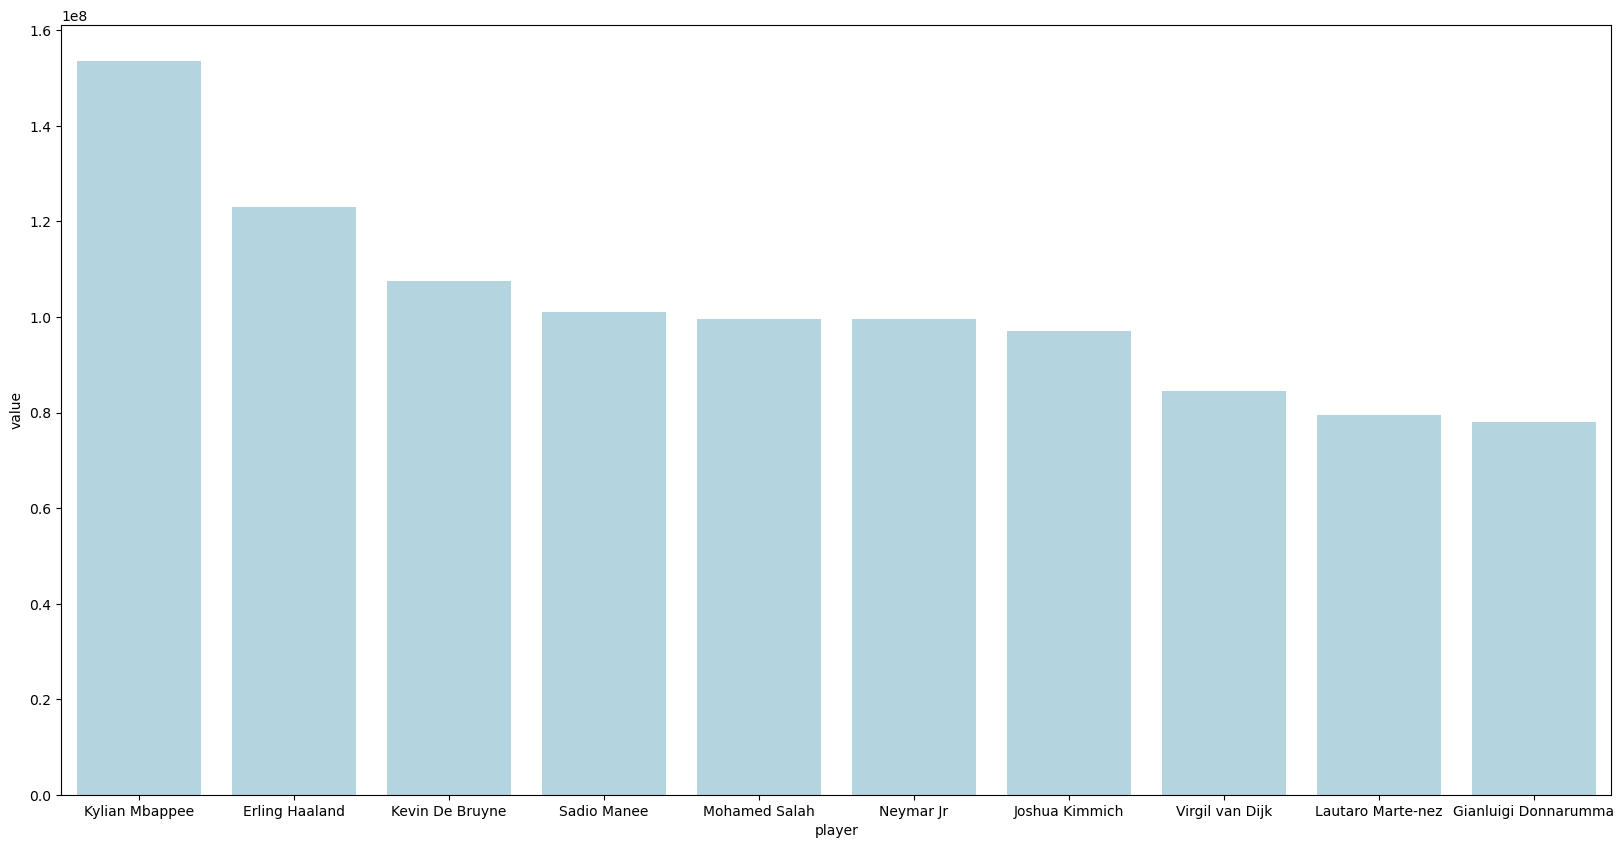

In [475]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.barplot(x='player', y='value',data=asto_se_emena,ax=ax,color="lightblue")
None

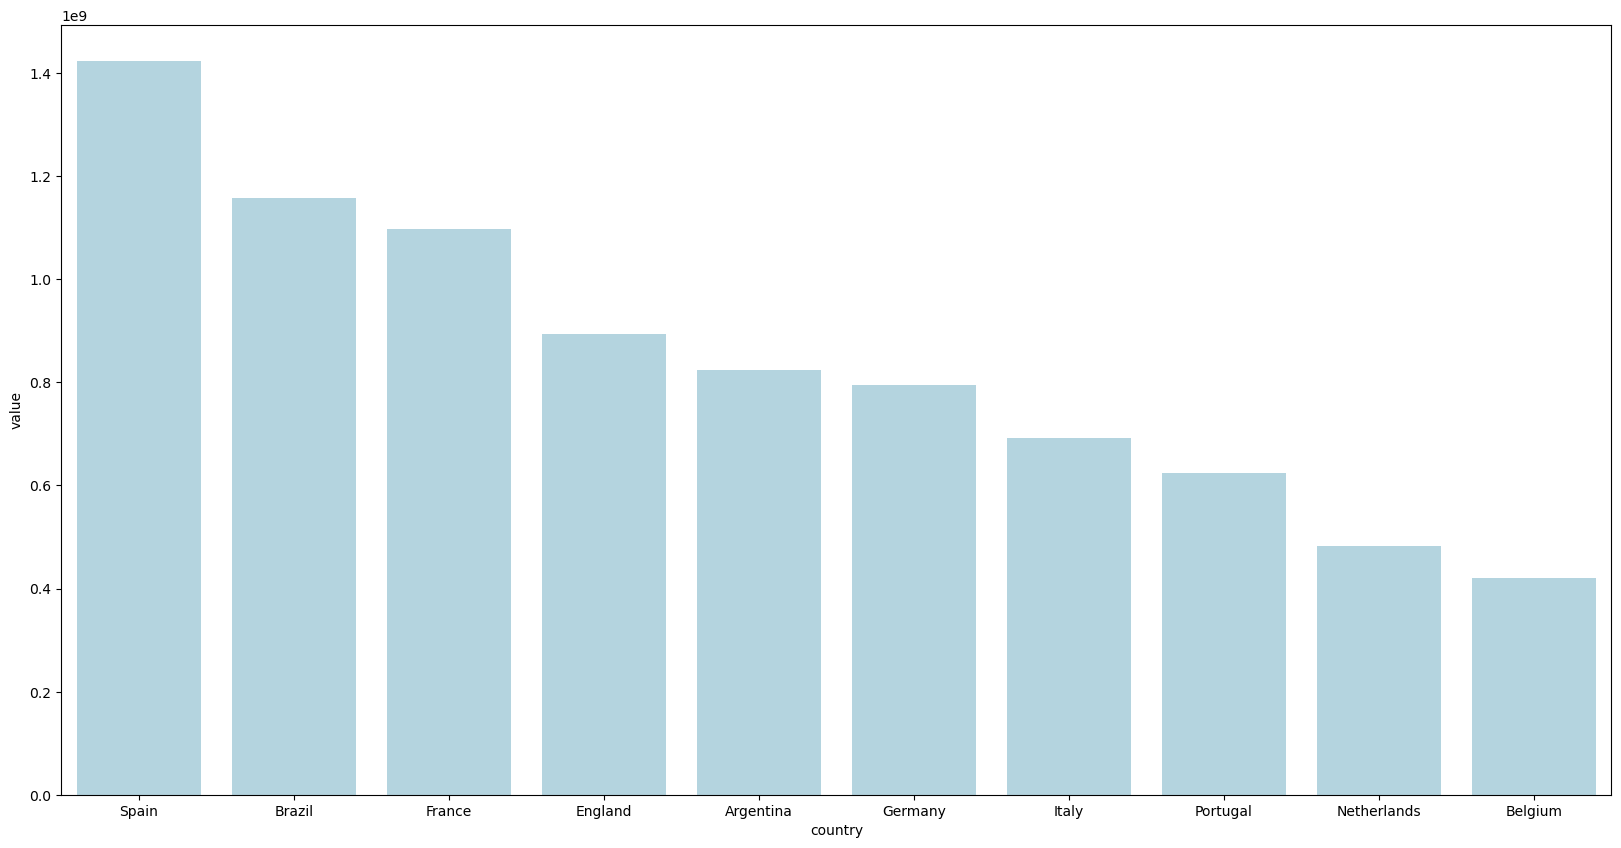

In [474]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.barplot(x='country', y='value',data=countries,ax=ax,color="lightBlue")

None

In [482]:
v_pre_team=df_3.groupby('club')['value'].sum().sort_values(ascending=False).reset_index().head(10)

In [483]:
v_pre_team

,club,value
0,Manchester City,427033500
1,FC Bayern MÃ¼nchen,409543000
2,Paris SG,400725000
3,Manchester Utd,348327500
4,Liverpool,314188500
5,Arsenal,273935500
6,Brazil,215000000
7,Chelsea,213560000
8,AtlÃ©tico de Madrid,197750000
9,FC Barcelona,186345000


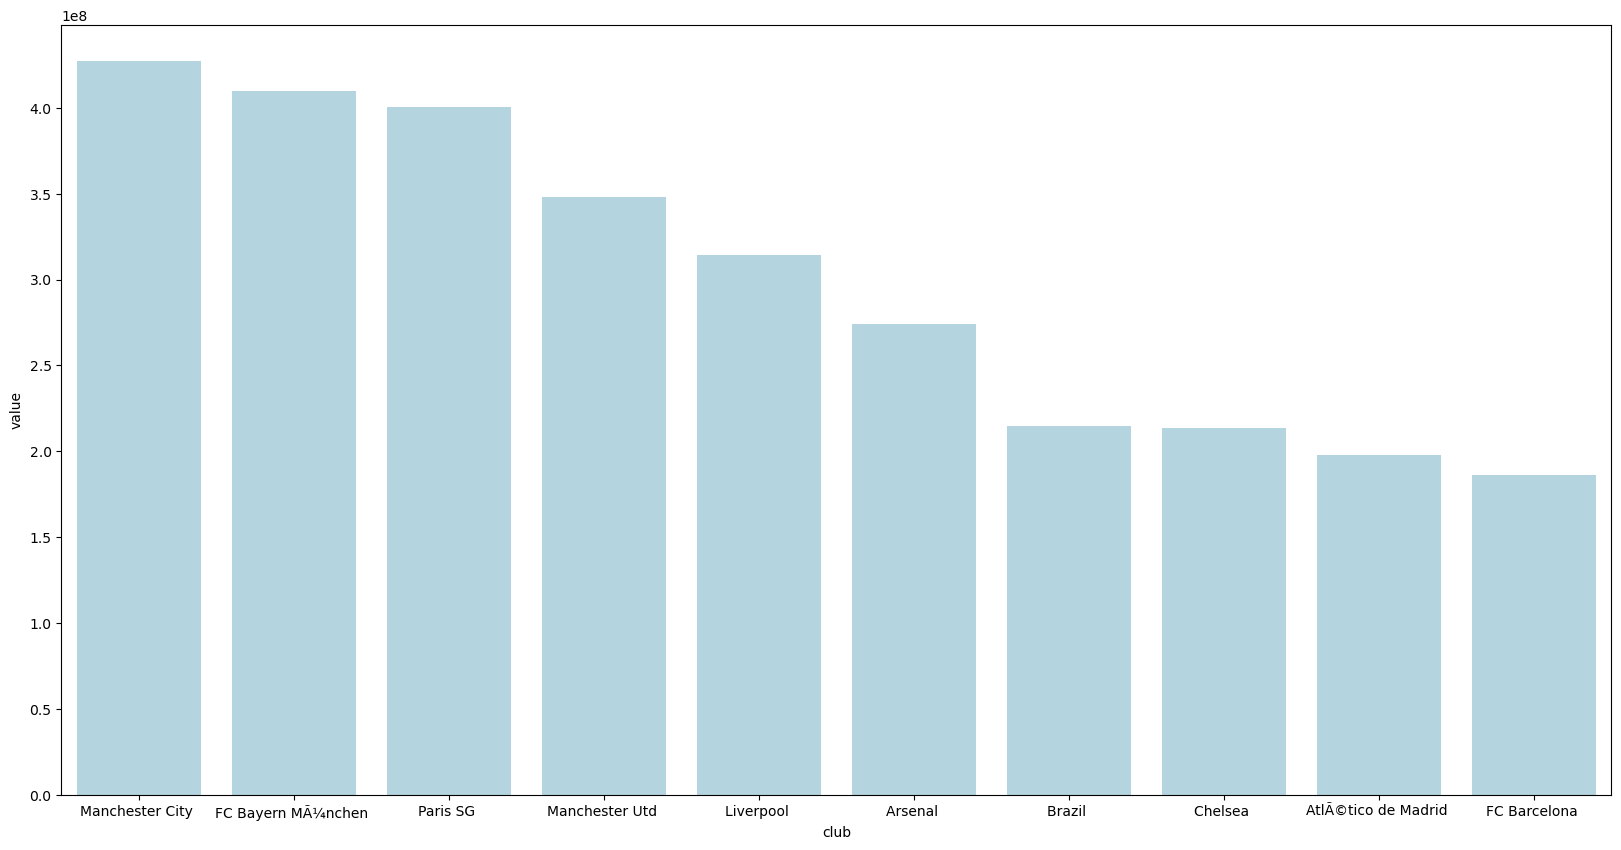

In [484]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.barplot(x='club', y='value',data=v_pre_team,ax=ax,color="lightblue")

None